# Analyzing Open University Learning Analytics Dataset

#### Reference: https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset#

#### Complete data and data description: https://analyse.kmi.open.ac.uk/open_dataset

Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)----AAA, BBB, CCC, DDD, EEE, FFF, GGG. Presentations of courses start in February and October - they are marked by 'B' and 'J' respectively (2013B, 2013J, 2014B, 2014J). The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files
<ol>
    <li>assessements.csv</li>
    <li>courses.csv</li>
    <li>studentAssessment.csv</li>
    <li>studentInfo.csv</li>
    <li>studentRegistration.csv</li>
    <li>studentVle.csv</li>
    <li>vle.csv</li>
</ol>

In [1]:
!ls

Analyzing_Open_University_Learning_Analytics_Dataset.ipynb
Dataset
README.md


In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
%matplotlib inline

#bokeh
from bokeh.io import output_notebook, show
output_notebook()
from bokeh.plotting import figure, output_file, show, ColumnDataSource

Loading BokehJS ...

In [3]:
student_info = pd.read_csv('Dataset/studentInfo.csv')
student_assessment = pd.read_csv('Dataset/studentAssessment.csv')
student_registration = pd.read_csv('Dataset/studentRegistration.csv')
student_vle = pd.read_csv('Dataset/studentVle.csv')
assessments = pd.read_csv('Dataset/assessments.csv')
courses = pd.read_csv('Dataset/courses.csv')
vle = pd.read_csv('Dataset/vle.csv')

In [4]:
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


In [5]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [6]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [7]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [8]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [9]:
assessments.head()


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [10]:
courses.head()


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [11]:
vle.head()


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [12]:
student_info.shape

(32593, 12)

In [13]:
student_assessment.shape

(173912, 5)

In [14]:
student_registration.shape

(32593, 5)

In [15]:
student_vle.shape

(10655280, 6)

In [16]:
assessments.shape

(206, 6)

In [17]:
courses.shape

(22, 3)

In [18]:
vle.shape

(6364, 6)

In [19]:
def tabel(colname, rowname, data):
    tab = pd.crosstab(data[colname], data[rowname]) 
    tab.reset_index(level=0, inplace=True)
    
    tab['total'] = 0
    cols = [colname]
    for col in data[rowname].unique():
        tab['total'] = tab['total'] + tab[col]    
        cols.append(col)
    cols.append('total')
    #tab.columns = cols
    for col in data[rowname].unique():
        ratiocol = col + '_%'
        tab[ratiocol] = round(100 * tab[col] / tab['total'], 2)
    return tab

In [20]:
colname = 'age_band'
tabel(colname, 'final_result', student_info)

final_result,age_band,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0-35,1863,5231,8469,7381,22944,36.91,32.17,22.80,8.12
1,35-55,1120,1792,3800,2721,9433,40.28,28.85,19.00,11.87
2,55<=,41,29,92,54,216,42.59,25.00,13.43,18.98


In [21]:
colname = 'region'
tabel(colname, 'final_result', student_info)

final_result,region,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,East Anglian Region,327,698,1309,1006,3340,39.19,30.12,20.90,9.79
1,East Midlands Region,200,462,881,822,2365,37.25,34.76,19.53,8.46
2,Ireland,98,261,552,273,1184,46.62,23.06,22.04,8.28
3,London Region,263,744,1099,1110,3216,34.17,34.51,23.13,8.18
4,North Region,230,327,691,575,1823,37.90,31.54,17.94,12.62
5,North Western Region,213,704,955,1034,2906,32.86,35.58,24.23,7.33
6,Scotland,328,852,1359,907,3446,39.44,26.32,24.72,9.52
7,South East Region,244,375,843,649,2111,39.93,30.74,17.76,11.56
8,South Region,333,544,1287,928,3092,41.62,30.01,17.59,10.77
9,South West Region,264,465,949,758,2436,38.96,31.12,19.09,10.84


In [22]:
colname = 'highest_education'
tabel(colname, 'final_result', student_info)

final_result,highest_education,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,A Level or Equivalent,1496,2707,5812,4030,14045,41.38,28.69,19.27,10.65
1,HE Qualification,697,790,1960,1283,4730,41.44,27.12,16.70,14.74
2,Lower Than A Level,727,3426,4385,4620,13158,33.33,35.11,26.04,5.53
3,No Formal quals,16,95,87,149,347,25.07,42.94,27.38,4.61
4,Post Graduate Qualification,88,34,117,74,313,37.38,23.64,10.86,28.12


In [23]:
colname = 'studied_credits'
credits = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
tab = pd.crosstab(student_info[student_info[colname].isin(credits)][colname], student_info[student_info[colname].isin(credits)].final_result) 

tab.reset_index(level=0, inplace=True)
tab.columns = [colname, 'Distinction', 'Fail', 'Pass', 'Withdrawn']
tab['total'] = tab.Distinction + tab.Fail + tab.Pass + tab.Withdrawn
tab['Distinction_%'] = round(100 * tab['Distinction'] / tab['total'], 2)
tab['Fail_%'] = round(100 * tab['Fail'] / tab['total'], 2)
tab['Pass_%'] = round(100 * tab['Pass'] / tab['total'], 2)
tab['Withdrawn_%'] = round(100 * tab['Withdrawn'] / tab['total'], 2)
tab

,studied_credits,Distinction,Fail,Pass,Withdrawn,total,Distinction_%,Fail_%,Pass_%,Withdrawn_%
0,30,530,1011,1580,628,3749,14.14,26.97,42.14,16.75
1,60,1542,3677,6961,4571,16751,9.21,21.95,41.56,27.29
2,90,296,649,1054,1145,3144,9.41,20.64,33.52,36.42
3,120,515,1238,2026,2549,6328,8.14,19.56,32.02,40.28
4,150,38,151,236,344,769,4.94,19.64,30.69,44.73
5,180,32,160,200,438,830,3.86,19.28,24.10,52.77
6,210,6,25,37,101,169,3.55,14.79,21.89,59.76
7,240,8,26,36,150,220,3.64,11.82,16.36,68.18
8,270,2,9,9,25,45,4.44,20.00,20.00,55.56
9,300,1,7,5,16,29,3.45,24.14,17.24,55.17


In [24]:
colname = 'imd_band'
tabel(colname, 'final_result', student_info)

final_result,imd_band,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0-10%,168,916,996,1231,3311,30.08,37.18,27.67,5.07
1,10-20,191,912,1167,1246,3516,33.19,35.44,25.94,5.43
2,20-30%,263,844,1226,1321,3654,33.55,36.15,23.10,7.20
3,30-40%,315,784,1345,1095,3539,38.01,30.94,22.15,8.90
4,40-50%,293,697,1224,1042,3256,37.59,32.00,21.41,9.00
5,50-60%,297,701,1227,899,3124,39.28,28.78,22.44,9.51
6,60-70%,299,538,1209,859,2905,41.62,29.57,18.52,10.29
7,70-80%,313,599,1170,797,2879,40.64,27.68,20.81,10.87
8,80-90%,328,495,1165,774,2762,42.18,28.02,17.92,11.88
9,90-100%,358,421,1101,656,2536,43.41,25.87,16.60,14.12


In [25]:
colname = 'gender'
tabel(colname, 'final_result', student_info)

final_result,gender,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,F,1394,3103,5735,4486,14718,38.97,30.48,21.08,9.47
1,M,1630,3949,6626,5670,17875,37.07,31.72,22.09,9.12


In [26]:
colname = 'code_module'
tabel(colname, 'final_result', student_info)

final_result,code_module,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,AAA,44,91,487,126,748,65.11,16.84,12.17,5.88
1,BBB,677,1767,3077,2388,7909,38.91,30.19,22.34,8.56
2,CCC,498,781,1180,1975,4434,26.61,44.54,17.61,11.23
3,DDD,383,1412,2227,2250,6272,35.51,35.87,22.51,6.11
4,EEE,356,562,1294,722,2934,44.10,24.61,19.15,12.13
5,FFF,670,1711,2978,2403,7762,38.37,30.96,22.04,8.63
6,GGG,396,728,1118,292,2534,44.12,11.52,28.73,15.63


In [27]:
colname = 'disability'
tabel(colname, 'final_result', student_info)

final_result,disability,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,N,2801,6340,11377,8911,29429,38.66,30.28,21.54,9.52
1,Y,223,712,984,1245,3164,31.10,39.35,22.50,7.05


In [28]:
colname = 'code_presentation'
tabel(colname, 'final_result', student_info)

final_result,code_presentation,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,2013B,327,1241,1768,1348,4684,37.75,28.78,26.49,6.98
1,2013J,749,2001,3726,2369,8845,42.13,26.78,22.62,8.47
2,2014B,784,1833,2574,2613,7804,32.98,33.48,23.49,10.05
3,2014J,1164,1977,4293,3826,11260,38.13,33.98,17.56,10.34


In [29]:
colname = 'num_of_prev_attempts'
tabel(colname, 'final_result', student_info)

final_result,num_of_prev_attempts,Distinction,Fail,Pass,Withdrawn,total,Pass_%,Withdrawn_%,Fail_%,Distinction_%
0,0,2857,5731,11148,8685,28421,39.22,30.56,20.16,10.05
1,1,143,1009,997,1150,3299,30.22,34.86,30.59,4.33
2,2,22,236,170,247,675,25.19,36.59,34.96,3.26
3,3,1,57,31,53,142,21.83,37.32,40.14,0.70
4,4,0,12,13,14,39,33.33,35.90,30.77,0.00
5,5,0,6,2,5,13,15.38,38.46,46.15,0.00
6,6,1,1,0,2,4,0.00,50.00,25.00,25.00


#### Question: 
Are there students who take multiple modules in this dataset? (E.g student A takes AAA, BBB and GGG)

In [30]:
student_11391 = student_registration['id_student'] == 11391
filter_AAA = student_registration['code_module'] == 'AAA'
student_registration[student_11391]

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?


In [31]:
module_AAA = student_registration[filter_AAA]
module_AAA[module_AAA.duplicated(keep=False)]

,code_module,code_presentation,id_student,date_registration,date_unregistration


Let's take a look at the breakdown of assessment type for module AAA

TMA = Tutor Marked Assessment

CMA = Computer Marked Assessment

In [54]:
assessment_breakdown = assessments['code_module'] == 'AAA'
module_A = assessments[assessment_breakdown]
module_A.shape

(12, 6)

In [53]:
assessment_breakdown = assessments['code_module'] == 'BBB'
module_B = assessments[assessment_breakdown]
module_B.shape

(42, 6)

In [52]:
assessment_breakdown = assessments['code_module'] == 'CCC'
module_C = assessments[assessment_breakdown]
module_C.shape

(20, 6)

In [51]:
assessment_breakdown = assessments['code_module'] == 'DDD'
module_D = assessments[assessment_breakdown]
module_D.shape

(35, 6)

In [48]:
assessment_breakdown = assessments['code_module'] == 'EEE'
module_E = assessments[assessment_breakdown]
module_E.shape

(15, 6)

In [50]:
assessment_breakdown = assessments['code_module'] == 'FFF'
module_F = assessments[assessment_breakdown]
module_F.shape

(52, 6)

In [49]:
assessment_breakdown = assessments['code_module'] == 'GGG'
module_G = assessments[assessment_breakdown]
module_G.shape

(30, 6)

#### Question: 
Exactly how many students take Module AAA?

In [36]:
filter_A = student_info['code_module'] == 'AAA'
module_A_results = student_info[filter_A]
module_A_results.shape
#748 students who took Module AAA

(748, 12)

In [40]:
#Return the number of students who registered for each course in every year
student_registration.groupby(['code_module','code_presentation']).size().reset_index(name='Students_enrolled')

,code_module,code_presentation,Students_enrolled
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


In [58]:
#check total assessments in each courses
assessments.groupby(['code_module','code_presentation']).size().reset_index(name='Total_assessments')
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [59]:
student_registration.groupby(['code_module','code_presentation']).size().reset_index(name='Total_date_registration')

,code_module,code_presentation,Total_date_registration
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


In [72]:
student_info['region'].value_counts(sort=True)

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

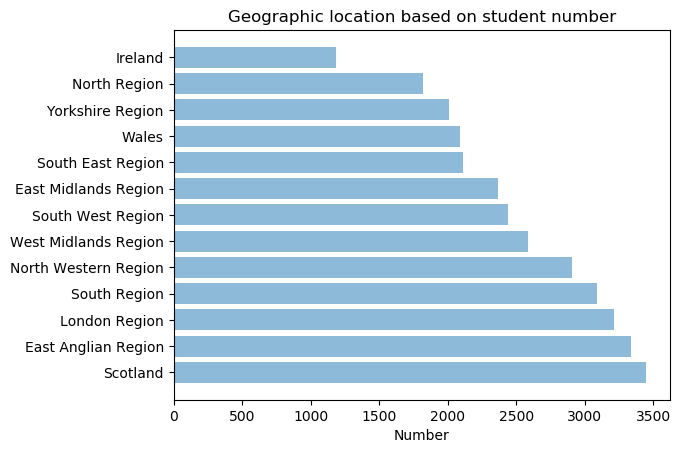

In [71]:
objects = ('Scotland', 
           'East Anglian Region', 
           'London Region', 
           'South Region',
           'North Western Region', 
           'West Midlands Region', 
           'South West Region', 
           'East Midlands Region', 
           'South East Region',
           'Wales', 
           'Yorkshire Region',
           'North Region',
           'Ireland' )
y_pos = np.arange(len(objects))
performance = student_info['region'].value_counts(sort=True).to_list()

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number')
plt.title('Geographic location based on student number')

plt.show()